<a href="https://colab.research.google.com/github/Ashu598/conversation_analysis/blob/main/biztel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import json

# Load JSON file
file_path = "/content/BiztelAI_DS_Dataset_Mar'25.json"
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert JSON to a structured DataFrame
rows = []
for conv_id, conv_data in data.items():
    article_url = conv_data.get("article_url", "")
    config = conv_data.get("config", "")
    conversation_rating = conv_data.get("conversation_rating", {})

    for turn in conv_data.get("content", []):
        rows.append({
            "conversation_id": conv_id,
            "article_url": article_url,
            "config": config,
            "message": turn["message"],
            "agent": turn["agent"],
            "sentiment": turn["sentiment"],
            "knowledge_source": ", ".join(turn["knowledge_source"]),
            "turn_rating": turn["turn_rating"],
            "agent_1_rating": conversation_rating.get("agent_1", ""),
            "agent_2_rating": conversation_rating.get("agent_2", "")
        })

# Create DataFrame
df = pd.DataFrame(rows)

# Display first few rows
df.head()


,conversation_id,article_url,config,message,agent,sentiment,knowledge_source,turn_rating,agent_1_rating,agent_2_rating
0,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,C,Did you know that the University of Iowa's loc...,agent_1,Curious to dive deeper,FS1,Good,Good,Good
1,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,C,I think I did hear something about that. I im...,agent_2,Neutral,FS1,Good,Good,Good
2,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,C,"So, it would be in the visiting team's locker ...",agent_1,Curious to dive deeper,FS1,Good,Good,Good
3,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,C,Right. Teams do all kinds of things to bother...,agent_2,Neutral,FS1,Good,Good,Good
4,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,C,"I would hate a cold bench. Then again, I would...",agent_1,Neutral,Personal Knowledge,Good,Good,Good


In [ ]:


# Save the DataFrame to a CSV file
df.to_csv('conversation_data.csv', index=False)


## Data Cleaning

### Handle Missing Values, Duplicates & Data Types

In [ ]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 conversation_id     0
article_url         0
config              0
message             0
agent               0
sentiment           0
knowledge_source    0
turn_rating         0
agent_1_rating      0
agent_2_rating      0
dtype: int64


In [ ]:
print("Duplicate Records:", df.duplicated().sum())


Duplicate Records: 0


- No missing values
- No duplicate records

### Check datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   conversation_id   11760 non-null  object
 1   article_url       11760 non-null  object
 2   config            11760 non-null  object
 3   message           11760 non-null  object
 4   agent             11760 non-null  object
 5   sentiment         11760 non-null  object
 6   knowledge_source  11760 non-null  object
 7   turn_rating       11760 non-null  object
 8   agent_1_rating    11760 non-null  object
 9   agent_2_rating    11760 non-null  object
dtypes: object(10)
memory usage: 918.9+ KB


In [ ]:
df.sample(5)

,conversation_id,article_url,config,message,agent,sentiment,knowledge_source,turn_rating,agent_1_rating,agent_2_rating
10210,t_79cf42f0-1df6-46d0-a905-05a14f6917c9,https://www.washingtonpost.com/news/dc-sports-...,A,It is funny that the Saints players are forbid...,agent_1,Surprised,FS1,Good,Good,Excellent
3137,t_66d888fd-3b7e-42e6-9dd3-b795eb942930,http://www.washingtonpost.com/politics/2018/11...,D,"ya I don't know haha, I think President Banana...",agent_1,Surprised,FS1,Excellent,Excellent,Good
7268,t_771b05e0-caf7-4895-93b6-5be299bb8519,https://www.washingtonpost.com/local/for-tom-b...,D,"I havent read his book, but I personally dont ...",agent_1,Neutral,Personal Knowledge,Good,Good,Excellent
1813,t_a9c78611-74dd-4e95-8d88-28d2aa254909,https://www.washingtonpost.com/news/sports/wp/...,C,Yes me too. did you know women can play too?,agent_1,Curious to dive deeper,FS1,Excellent,Excellent,Excellent
10814,t_e64b3f0d-7672-48da-88b1-c4002c778e97,https://www.washingtonpost.com/sports/as-maryl...,C,Yep. I think I'd rather be a competitive game...,agent_2,Curious to dive deeper,"FS3, Personal Knowledge",Good,Good,Good


- All the datatypes look good.

## Convert Categorical Variables into Numerical Representations

In [ ]:
df['config'] = df['config'].map({"A":1, "B":2, "C":3, "D":4})
df['agent'] = df['agent'].map({"agent_1":1, "agent_2":2})
df['sentiment'] = df['sentiment'].map({"Fearful":0, "Angry":1, "Disgusted":2, "Sad":3, "Neutral":4, "Surprised": 5, "Happy":6})
df['turn_rating'] = df['turn_rating'].map({"Poor":0, "Not Good":1, "Passable":2, "Good":3, "Excellent":4})
df['agent_1_rating'] = df['agent_1_rating'].map({"Not Good":1, "Passable":2, "Good":3, "Excellent":4})
df['agent_2_rating'] = df['agent_2_rating'].map({"Not Good":1, "Passable":2, "Good":3, "Excellent":4})

## Perform Text Preprocessing
If the message column needs preprocessing (for NLP tasks like sentiment analysis), apply:

In [ ]:
df["message"][3]

"Right.  Teams do all kinds of things to bother the competition. I've heard of teams having heated benches in the winter for themselves but not for the visitors."

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt_tab')
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)  # Remove special characters
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stopwords.words("english")]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return " ".join(words)

df["cleaned_message"] = df["message"].apply(preprocess_text)
df[["message", "cleaned_message"]].head()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,message,cleaned_message
0,Did you know that the University of Iowa's loc...,know university iowa locker room painted pink ...
1,I think I did hear something about that. I im...,think hear something imagine attempt psych team
2,"So, it would be in the visiting team's locker ...",would visiting team locker room
3,Right. Teams do all kinds of things to bother...,right team kind thing bother competition heard...
4,"I would hate a cold bench. Then again, I would...",would hate cold bench want place cold watching...


# Task 2

### Explore the dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



- Messages Sent by Each Agent

<ipython-input-90-74f4027af271>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agent_message_count.index, y=agent_message_count.values, palette="viridis")


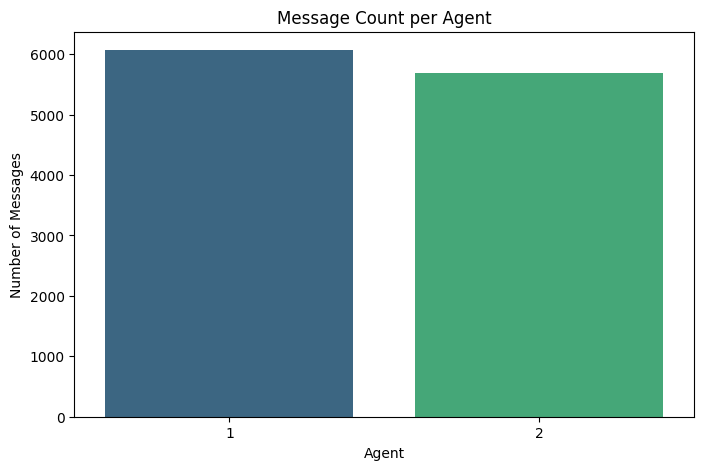

In [ ]:
# Count messages per agent
agent_message_count = df["agent"].value_counts()
agent_message_count

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=agent_message_count.index, y=agent_message_count.values, palette="viridis")
plt.xlabel("Agent")
plt.ylabel("Number of Messages")
plt.title("Message Count per Agent")
plt.show()




<ipython-input-91-6bfa210e0b15>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette="coolwarm")


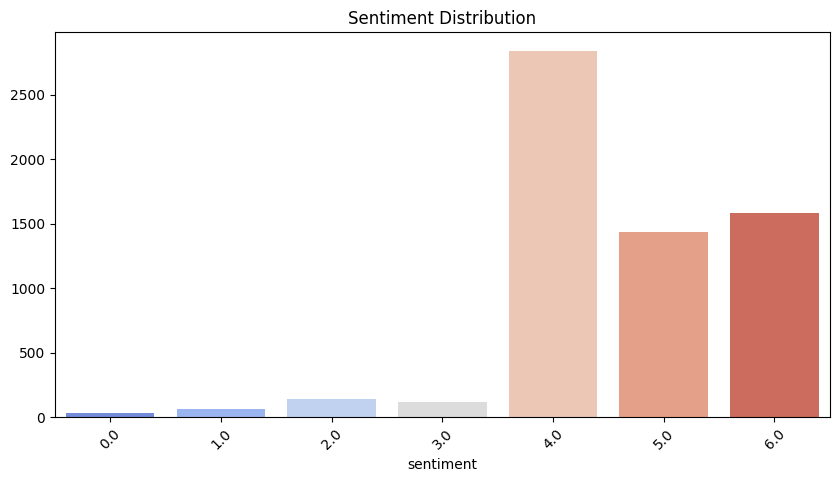

In [ ]:
# Count sentiment occurrences
sentiment_count = df["sentiment"].value_counts()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Sentiment Distribution")
plt.show()

## Summarizing Conversations

In [ ]:
def summarize_chat(conversation_id):
    chat_df = df[df["conversation_id"] == conversation_id]

    # Extract article link
    article_url = chat_df["article_url"].iloc[0]

    # Count messages per agent
    agent_counts = chat_df["agent"].value_counts().to_dict()

    # Overall sentiment per agent
    sentiment_summary = chat_df.groupby("agent")["sentiment"].apply(lambda x: x.mode()[0]).to_dict()

    # Return summary
    return {
        "article_url": article_url,
        "messages_by_agents": agent_counts,
        "overall_sentiment_by_agent": sentiment_summary
    }

# Example Usage
conversation_id = "t_d004c097-424d-45d4-8f91-833d85c2da31"
chat_summary = summarize_chat(conversation_id)
print(chat_summary)


{'article_url': 'https://www.washingtonpost.com/sports/colleges/good-night-keith-jackson-and-thanks/2018/01/13/79aff714-f898-11e7-b34a-b85626af34ef_story.html', 'messages_by_agents': {1: 11, 2: 11}, 'overall_sentiment_by_agent': {1: 4.0, 2: 4.0}}


### Implement LLM-Based Summarization

In [ ]:
!pip install transformers sentencepiece torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from transformers import pipeline

# Load the summarization model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Summarize a conversation
def llm_summarize_chat(conversation_id):
    chat_df = df[df["conversation_id"] == conversation_id]
    text = " ".join(chat_df["message"].tolist())  # Merge all messages

    summary = summarizer(text, max_length=150, min_length=50, do_sample=False)[0]["summary_text"]

    return {
        "article_url": chat_df["article_url"].iloc[0],
        "summary": summary
    }

# Example Usage
conversation_id = "t_d004c097-424d-45d4-8f91-833d85c2da31"
chat_summary = llm_summarize_chat(conversation_id)
print(chat_summary)


Device set to use cpu


{'article_url': 'https://www.washingtonpost.com/sports/colleges/good-night-keith-jackson-and-thanks/2018/01/13/79aff714-f898-11e7-b34a-b85626af34ef_story.html', 'summary': "Have you heard about the Georgia Tech-Cumberland game of 1916? No, what happened in that game? Georgia Tech defeated Cumberland but here's the thing, they defeated them by a score of 222-0! That is insane. Did you know that the University of Iowa's locker room is painted pink? I wonder why?"}


## Deploy API for Chat Summarization

In [ ]:
!pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.1 MB/s eta 0:00:00
